# Run the whole deltas algorithm

In [86]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

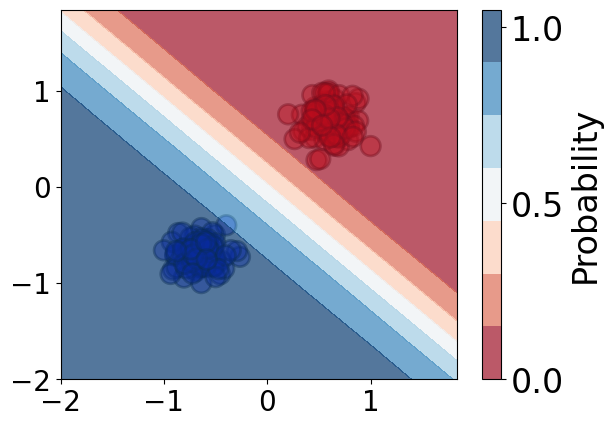

In [87]:
N1 = 100
N2 = 100
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.3928146379279299
R2 empirical: 0.39330003052874973


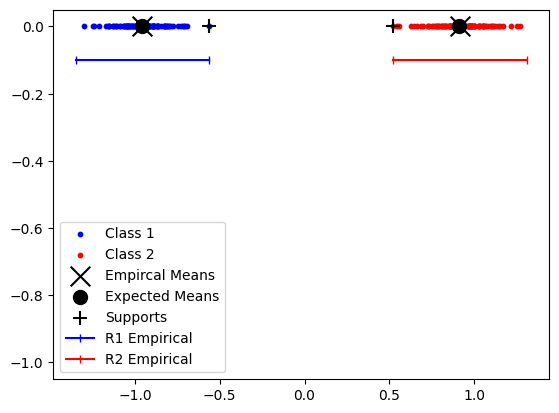

In [88]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'])

## set up extra parameters

In [89]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.2988637497962223
        N1: 100
        N2: 100
        R1: 0.3928146379279299
        R2: 0.39330003052874973
        M:  1.087685410963212
        D:  1.8738000794198917
        C1: 1
        C2: 1


## Optimiser

delta1 : 0.9826555028733148 
delta2: 1.0
constraint: 3.3485862971360802e-09 should equal 0
R1_est : 0.9609545523212392 
R2_est: 0.961439944922059


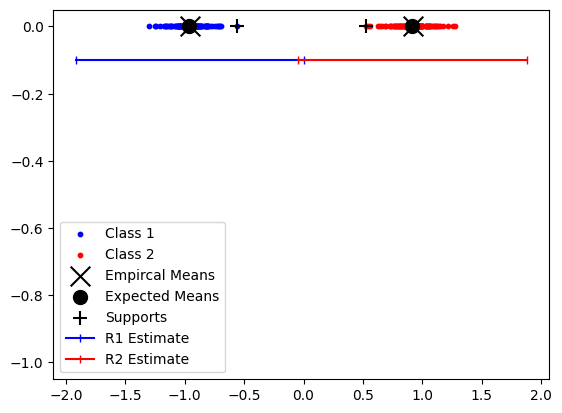

In [90]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation
loss_func = lambda delta, data_info: deltas.loss(delta[0], delta[1], data_info)

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, num_deltas=2)